# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.  


2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.  


3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor. 
    

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [140]:
df = pd.read_csv('previsao_de_renda.csv')

#Prefiro moldar o data frame e deixa-lo melhor do que fazer as categorização com patsy.
df.drop('Unnamed: 0',axis=1,inplace=True)
df['sexo'] = df['sexo'].map({'F':0,'M':1})
df['posse_de_veiculo'] = df['posse_de_veiculo'].astype(int)
df['posse_de_imovel'] = df['posse_de_imovel'].astype(int)
df['mau'] = df['mau'].astype(int)
df['data_ref'] = pd.to_datetime(df['data_ref']) 
df.dropna(inplace=True)
df.reset_index(inplace= True)
df_tst = df.copy()

df.drop_duplicates(inplace=True)
df.head()

,level_0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,0,0,1,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,0,3369.24
1,1,2015-01-01,12830,1,1,1,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,0,6096.14
2,2,2015-01-01,2885,1,1,1,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,0,5658.98
3,3,2015-01-01,16168,0,1,0,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,0,7246.69
4,4,2015-01-01,12438,1,0,0,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,0,4017.37


In [141]:
df = pd.get_dummies(df,columns=['tipo_residencia','estado_civil','educacao','tipo_renda'],drop_first=True)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12466 entries, 0 to 12465
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   level_0                        12466 non-null  int64         
 1   data_ref                       12466 non-null  datetime64[ns]
 2   index                          12466 non-null  int64         
 3   sexo                           12466 non-null  int64         
 4   posse_de_veiculo               12466 non-null  int32         
 5   posse_de_imovel                12466 non-null  int32         
 6   qtd_filhos                     12466 non-null  int64         
 7   idade                          12466 non-null  int64         
 8   tempo_emprego                  12466 non-null  float64       
 9   qt_pessoas_residencia          12466 non-null  float64       
 10  mau                            12466 non-null  int32         
 11  renda          

In [143]:
df['log_renda'] = np.log(df['renda'])

In [144]:
X = df.drop(columns=['data_ref','level_0','index','log_renda','renda'],axis=1)
y = df[['log_renda']]

In [145]:
reg1 = sm.OLS(y,X).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_renda   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          6.446e+04
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                        0.00
Time:                        12:20:30   Log-Likelihood:                         -13545.
No. Observations:               12466   AIC:                                  2.714e+04
Df Residuals:                   12441   BIC:                                  2.733e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
sexo                              0.5005      0.015     34.107      0.000       0.472       0.529
posse_de_veiculo                  0.0035      0.014      0.250      0.802      -0.024       0.031
posse_de_imovel                   0.0930      0.014      6.690      0.000       0.066       0.120
qtd_filhos                       -3.1670      0.047    -67.447      0.000      -3.259      -3.075
idade                             0.0068      0.001      8.540      0.000       0.005       0.008
tempo_emprego                     0.0484      0.001     47.196      0.000       0.046       0.050
qt_pessoas_residencia             3.1934      0.045     70.666      0.000       3.105       3.282
mau                              -0.0706      0.043     -1.655      0.098      -0.154       0.013
tipo_residencia_Casa              0.2784      0.054      5.172      0.000       0.173       0.384
tipo_residencia_Com os pais       0.2232      0.060      3.690      0.000       0.105       0.342
tipo_residencia_Comunitário       0.3545      0.105      3.373      0.001       0.148       0.560
tipo_residencia_Estúdio           0.1436      0.091      1.583      0.113      -0.034       0.321
tipo_residencia_Governamental     0.2215      0.065      3.389      0.001       0.093       0.350
estado_civil_Separado             3.1447      0.053     59.065      0.000       3.040       3.249
estado_civil_Solteiro             3.1968      0.048     67.169      0.000       3.103       3.290
estado_civil_União                0.0036      0.024      0.151      0.880      -0.043       0.051
estado_civil_Viúvo                3.1482      0.062     50.991      0.000       3.027       3.269
educacao_Pós graduação            1.0268      0.179      5.726      0.000       0.675       1.378
educacao_Secundário               0.4986      0.071      7.067      0.000       0.360       0.637
educacao_Superior completo        0.5943      0.071      8.384      0.000       0.455       0.733
educacao_Superior incompleto      0.4861      0.076      6.383      0.000       0.337       0.635
tipo_renda_Bolsista              -0.0523      0.359     -0.145      0.884      -0.757       0.652
tipo_renda_Empresário             0.1897      0.015     12.626      0.000       0.160       0.219
tipo_renda_Pensionista            0.4565      0.243      1.877      0.061      -0.020       0.933
tipo_renda_Servidor público       0.0941      0.022      4.325      0.000       0.051       0.137
==============================================================================
Omnibus:                     1038.710   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5947.731
Ske

**Vejo diversas variáveis irrelevantes estatísticamente, com Pvalue alto. Também nota-se inconsistências no intervalo de confinça de algumas, alternando entre negativo e positivo. vou fazer uma remoção de algumas.**

In [146]:
#Mas antes quero fazer um teste
df_tst = df_tst.drop(columns=['level_0','data_ref','index'],axis=1)

In [147]:
reg_teste = smf.ols('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda,Treatment(3)) + C(educacao,Treatment(2)) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia + mau',data=df_tst).fit()
reg_teste.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     158.7
Date:                Fri, 12 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:20:30   Log-Likelihood:                -13204.
No. Observations:               12466   AIC:                         2.646e+04
Df Residuals:                   12440   BIC:                         2.665e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            7.6271      0.352     21.646      0.000       6.936       8.318
C(tipo_renda, Treatment(3))[T.Assalariado]          -0.4099      0.237     -1.732      0.083      -0.874       0.054
C(tipo_renda, Treatment(3))[T.Bolsista]             -0.4598      0.422     -1.089      0.276      -1.287       0.367
C(tipo_renda, Treatment(3))[T.Empresário]           -0.2312      0.237     -0.976      0.329      -0.695       0.233
C(tipo_renda, Treatment(3))[T.Servidor público]     -0.3150      0.237     -1.327      0.185      -0.780       0.150
C(educacao, Treatment(2))[T.Primário]               -0.0166      0.071     -0.233      0.816      -0.156       0.123
C(educacao, Treatment(2))[T.Pós graduação]           0.5330      0.161      3.316      0.001       0.218       0.848
C(educacao, Treatment(2))[T.Superior completo]       0.0969      0.013      7.200      0.000       0.070       0.123
C(educacao, Treatment(2))[T.Superior incompleto]    -0.0255      0.031     -0.826      0.409      -0.086       0.035
C(estado_civil)[T.Separado]                         -0.0395      0.131     -0.302      0.763      -0.296       0.217
C(estado_civil)[T.Solteiro]                          0.0213      0.129      0.166      0.868      -0.231       0.273
C(estado_civil)[T.União]                            -0.0256      0.023     -1.098      0.272      -0.071       0.020
C(estado_civil)[T.Viúvo]                            -0.0377      0.134     -0.280      0.779      -0.301       0.226
C(tipo_residencia)[T.Casa]                           0.0146      0.053      0.274      0.784      -0.090       0.119
C(tipo_residencia)[T.Com os pais]                   -0.0578      0.060     -0.967      0.334      -0.175       0.059
C(tipo_residencia)[T.Comunitário]                    0.0571      0.103      0.555      0.579      -0.145       0.259
C(tipo_residencia)[T.Estúdio]                       -0.1093      0.089     -1.231      0.218      -0.283       0.065
C(tipo_residencia)[T.Governamental]                 -0.0567      0.064     -0.880      0.379      -0.183       0.070
sexo                                                 0.4815      0.014     33.681      0.000       0.453       0.510
posse_de_veiculo                                    -0.0014      0.014     -0.104      0.917      -0.028       0.026
posse_de_imovel                                      0.0847      0.014      6.260      0.000       0.058       0.111
qtd_filhos                                           0.0047      0.128      0.037      0.971      -0.247       0.256
idade                                                0.0052      0.001      6.628      0.000       0.004       0.007
tempo_emprego                            

In [148]:
#indo a remoção


<AxesSubplot:xlabel='tipo_renda', ylabel='count'>

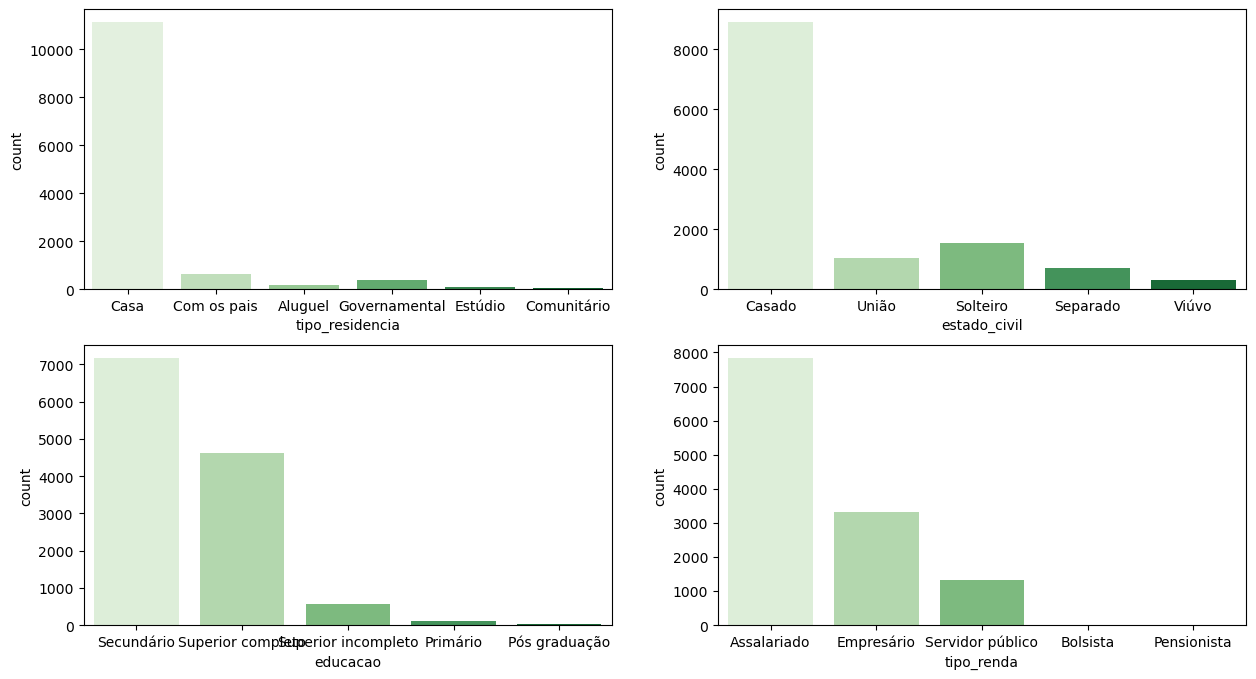

In [149]:
#Observando a distribuição de umas categóricas pra ver a frequência
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(15,8))

sns.countplot(data=df_tst,x='tipo_residencia',ax=ax[0][0],palette='Greens')
sns.countplot(data=df_tst,x='estado_civil',ax=ax[0][1],palette='Greens')
sns.countplot(data=df_tst,x='educacao',ax=ax[1][0],palette='Greens')
sns.countplot(data=df_tst,x='tipo_renda',ax=ax[1][1],palette='Greens')


In [150]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_renda   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          6.446e+04
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                        0.00
Time:                        12:20:31   Log-Likelihood:                         -13545.
No. Observations:               12466   AIC:                                  2.714e+04
Df Residuals:                   12441   BIC:                                  2.733e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
sexo                              0.5005      0.015     34.107      0.000       0.472       0.529
posse_de_veiculo                  0.0035      0.014      0.250      0.802      -0.024       0.031
posse_de_imovel                   0.0930      0.014      6.690      0.000       0.066       0.120
qtd_filhos                       -3.1670      0.047    -67.447      0.000      -3.259      -3.075
idade                             0.0068      0.001      8.540      0.000       0.005       0.008
tempo_emprego                     0.0484      0.001     47.196      0.000       0.046       0.050
qt_pessoas_residencia             3.1934      0.045     70.666      0.000       3.105       3.282
mau                              -0.0706      0.043     -1.655      0.098      -0.154       0.013
tipo_residencia_Casa              0.2784      0.054      5.172      0.000       0.173       0.384
tipo_residencia_Com os pais       0.2232      0.060      3.690      0.000       0.105       0.342
tipo_residencia_Comunitário       0.3545      0.105      3.373      0.001       0.148       0.560
tipo_residencia_Estúdio           0.1436      0.091      1.583      0.113      -0.034       0.321
tipo_residencia_Governamental     0.2215      0.065      3.389      0.001       0.093       0.350
estado_civil_Separado             3.1447      0.053     59.065      0.000       3.040       3.249
estado_civil_Solteiro             3.1968      0.048     67.169      0.000       3.103       3.290
estado_civil_União                0.0036      0.024      0.151      0.880      -0.043       0.051
estado_civil_Viúvo                3.1482      0.062     50.991      0.000       3.027       3.269
educacao_Pós graduação            1.0268      0.179      5.726      0.000       0.675       1.378
educacao_Secundário               0.4986      0.071      7.067      0.000       0.360       0.637
educacao_Superior completo        0.5943      0.071      8.384      0.000       0.455       0.733
educacao_Superior incompleto      0.4861      0.076      6.383      0.000       0.337       0.635
tipo_renda_Bolsista              -0.0523      0.359     -0.145      0.884      -0.757       0.652
tipo_renda_Empresário             0.1897      0.015     12.626      0.000       0.160       0.219
tipo_renda_Pensionista            0.4565      0.243      1.877      0.061      -0.020       0.933
tipo_renda_Servidor público       0.0941      0.022      4.325      0.000       0.051       0.137
==============================================================================
Omnibus:                     1038.710   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5947.731
Ske

In [151]:
new_X = X[['sexo','posse_de_imovel','qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia']]

model2 = sm.OLS(y,new_X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_renda   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                          7.960e+04
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                        0.00
Time:                        12:20:31   Log-Likelihood:                         -21022.
No. Observations:               12466   AIC:                                  4.206e+04
Df Residuals:                   12460   BIC:                                  4.210e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
sexo                      0.7806      0.025     31.568      0.000       0.732       0.829
posse_de_imovel           0.4484      0.024     18.355      0.000       0.400       0.496
qtd_filhos               -1.5016      0.031    -47.760      0.000      -1.563      -1.440
idade                     0.0922      0.001     89.635      0.000       0.090       0.094
tempo_emprego             0.0427      0.002     23.263      0.000       0.039       0.046
qt_pessoas_residencia     1.7763      0.023     78.212      0.000       1.732       1.821
==============================================================================
Omnibus:                      302.321   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.302
Skew:                           0.388   Prob(JB):                     3.79e-71
Kurtosis:                       3.150   Cond. No.                         139.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
#Outro tentativa, mas dessa vez pegando o modelo 1 e removendo apenas os insignificantes, mas não a classe toda.
#Com base no intervalo de confiança e Pvalue
X3 = X.drop(columns=['posse_de_veiculo','mau','tipo_residencia_Estúdio','estado_civil_União', 'tipo_renda_Bolsista','tipo_renda_Pensionista'],axis=1)
model3 = sm.OLS(y,X3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_renda   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          8.480e+04
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                        0.00
Time:                        12:20:31   Log-Likelihood:                         -13550.
No. Observations:               12466   AIC:                                  2.714e+04
Df Residuals:                   12447   BIC:                                  2.728e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
sexo                              0.5022      0.014     36.387      0.000       0.475       0.529
posse_de_imovel                   0.0927      0.014      6.674      0.000       0.065       0.120
qtd_filhos                       -3.1875      0.045    -71.116      0.000      -3.275      -3.100
idade                             0.0069      0.001      8.627      0.000       0.005       0.008
tempo_emprego                     0.0485      0.001     47.378      0.000       0.046       0.050
qt_pessoas_residencia             3.2140      0.043     74.915      0.000       3.130       3.298
tipo_residencia_Casa              0.2299      0.044      5.259      0.000       0.144       0.316
tipo_residencia_Com os pais       0.1757      0.052      3.394      0.001       0.074       0.277
tipo_residencia_Comunitário       0.3063      0.100      3.055      0.002       0.110       0.503
tipo_residencia_Governamental     0.1731      0.057      3.020      0.003       0.061       0.285
estado_civil_Separado             3.1645      0.051     61.601      0.000       3.064       3.265
estado_civil_Solteiro             3.2157      0.046     70.384      0.000       3.126       3.305
estado_civil_Viúvo                3.1663      0.060     52.550      0.000       3.048       3.284
educacao_Pós graduação            1.0346      0.179      5.773      0.000       0.683       1.386
educacao_Secundário               0.5030      0.070      7.135      0.000       0.365       0.641
educacao_Superior completo        0.5999      0.071      8.477      0.000       0.461       0.739
educacao_Superior incompleto      0.4888      0.076      6.424      0.000       0.340       0.638
tipo_renda_Empresário             0.1896      0.015     12.635      0.000       0.160       0.219
tipo_renda_Servidor público       0.0957      0.022      4.407      0.000       0.053       0.138
==============================================================================
Omnibus:                     1038.497   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6026.199
Skew:                           0.154   Prob(JB):                         0.00
Kurtosis:                       6.392   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O Modelo 3 é o mais equilibrado, pois mantém um alto R² e significância estatística das variáveis, além de ter um AIC e BIC menores do que o Modelo 2. Portanto, parece ser a melhor escolha entre os três modelos, oferecendo um bom ajuste com menos complexidade desnecessária. Apesar de estar eliminando algumas categorias e correr risco de um overfitting.

Mas a diferença do modelo inicial, foi que aqui removemos algunas colunas com pvalue maior de 5%
as estatísticas nao se alteraram significametne.

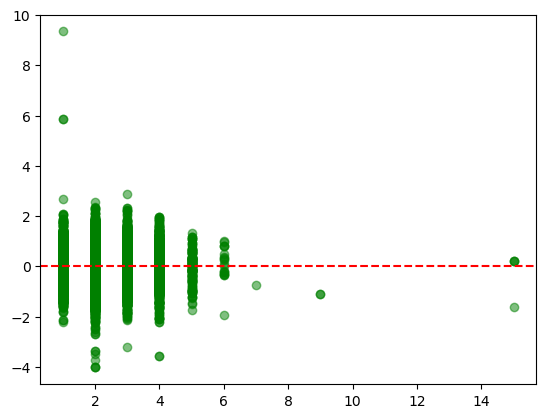

In [154]:
residuos = model3.resid
plt.scatter(X3['qt_pessoas_residencia'], residuos, alpha=0.5,color='g')
plt.axhline(0, color='red', linestyle='--')